<a href="https://colab.research.google.com/github/jash-ai/PYTHON/blob/main/introduction_time_series_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time Series Analysis and Forecasting

## Learning objectives

By the end of this unit you should be able to:
- Introduce the concept of time series
- Provide a compact mathematical representation of time series data
- Demonstrate how to pre-process time series data

**What we cover:**

**Part 1 - Understanding time series analysis**
- What is a time series?
- Time series analysis and applications
- ISO 8601 date and time Standard

**Part 2 - Components of time series**
- Compact representation of a time series

**Part 3 - Working with time series data**
- Visualise time series data
- Time series decomposition analysis

**Part 4 - Time series pre-processing technique: Resampling**
- Resampling, upsampling and downsampling

**Part 5 - Time series pre-processing technique: Smoothing**
- Smoothing, moving windows, moving average and exponential smoothing

**Part 6 - Time series pre-processing technique: Correlation**
- Correlation, shifting and autocorrelation

**Part 7 - Stationarity assumption in time series data**
- Stationarity and differencing

**Part 8 - Forecasting**
- What is time series forecasting?
- Forecasting example

# Part 1 - Understanding time series analysis

## ☑️ What is a time series?

- A time series is a sequence of data points recorded in chronological order at regular intervals.

- It represents the change in a particular variable or phenomenon over time (eg: sales, orders, temperature, rain fall)

- The data points in a time series are associated with a specific time period, such as hours, days, months, or years, depending on the frequency of data collection.

## ☑️ Time series analysis and applications

Time series analysis comprises a range of statistical methods to analyse and interpret patterns, trends, and dependencies in sequential data collected over time.

Time series analysis has a wide range of applications. The following are some common areas where time series analysis is applied:

- **Sales and Demand Forecasting**: Time series analysis is used to predict future sales and demand patterns.

- **Finance and Economics**: Time series analysis is extensively used in financial markets for forecasting stock prices, analyzing market trends, and economic forecasting.

- **Energy and Utilities**: Time series analysis is applied in the energy sector for load forecasting, energy price prediction, and renewable energy generation forecasting.

- **Weather and Climate Analysis**: Time series analysis is used to analyze weather patterns, predict climate trends, and forecast extreme events such as hurricanes or heatwaves.

These are just a few examples of the diverse applications of time series analysis.

## ☑️ ISO 8601 date and time Standard


- ISO 8601 is an international standard for representing date and time information in a standardised format.


- It defines a set of rules and formats for representing dates, times, and durations in a way that is universally understood and unambiguous.



- The ISO 8601 format for representing dates and times follows the pattern:
`YYYY-MM-DDTHH:MM:SS`
    - `YYYY-MM-DD` for Year, Month and Day
    - `HH:MM:SS` for Hour, Minute and Second
    -  **T** is the separator between the date and time components.


- Timezones are an **offset** from Coordinated Universal Time (UTC)
    - Indicated with a `+` or `-` **after** the time.
    
```python
iso_datetime         = "2020-06-23T16:58:30"
iso_datetime_with_tz = "2020-06-23T13:58:30+3"
iso_datetime_with_tz = "2020-06-23T13:58:30-5:30"
```
UTC offset of +3 means that the local time at that moment is three hours ahead of Coordinated Universal Time (UTC), where as UTC offset of -5:30 means that the local time at that moment is five hours and thirty minutes behind UTC. ([documentation](https://www.iso.org/iso-8601-date-and-time-format.html))

# Part 2 - Components of time series

## ☑️ Compact representation of a time series

A time series can be decomposed into several components, Trend, Seasonality and Noise (Irregularity or Residuals) each representing different underlying patterns, behaviour, or variations within the data.


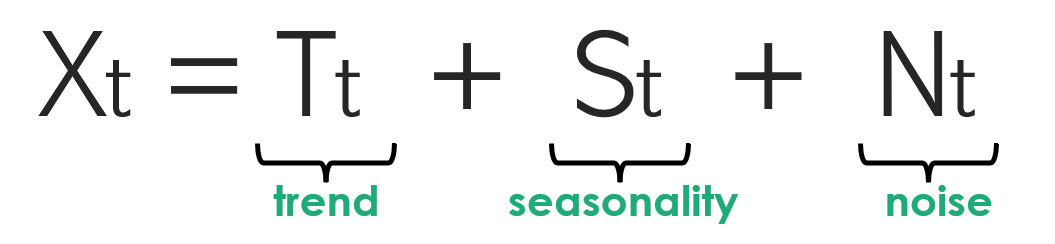

- The above equation represents the value of a variable at time 𝑡 (Xt) as the sum of three components: trend (Tt), seasonalality (St), and noise (Nt).


- The trend component captures the long-term direction or pattern, the seasonal component represents periodic variations, and the noise component accounts for random fluctuations or unexplained variability in the data.


- This equation allows for a breakdown of the time series into its constituent parts for in-depth analysis

# Part 3 - Working with time series data

## ☑️ Setting up the environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## ☑️ Importing Bikes dataset

- Let’s load the data from `bikes.csv` and assign it to the dataframe`bikes`:

The "bikes" dataset is a multivariate time series that includes information on the number of bikes rented per month (represented in count) as well as average meteorological conditions (temperature, humidity and windspeed).

This dataset provides a comprehensive view of the bike rental patterns along with associated weather factors. Data ranges from 2011-01-03 to 2012-12-31. By analysing this data, we can explore the relationship between bike rentals and meteorological conditions, identify seasonal patterns, and potentially uncover insights to optimize bike rental services based on weather conditions.

In [4]:
#Step 1: Load the data from 'bikes.csv' file
##bikes = pd.read_csv('data/bikes.csv')
bikes = pd.read_csv('bikes.csv')
##bikes.info() ## the date column is currently a dtype of object

#Step 2: Convert the 'date' column into datetime format
bikes['date'] = pd.to_datetime(bikes['date'])

#Step 3: Set the 'dates' column as the index
bikes.set_index('date', inplace=True)

bikes.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,2.716070,45.715346,21.414957,120.0
2011-01-04,2.896673,54.267219,15.136882,108.0
2011-01-05,4.235654,45.697702,17.034578,82.0
2011-01-06,3.112643,50.237349,10.091568,88.0
2011-01-07,2.723918,49.144928,15.738204,148.0


## ☑️ Visualise Bikes dataset

- Let's visualise the bikes time series using `pandas` plotting facility:

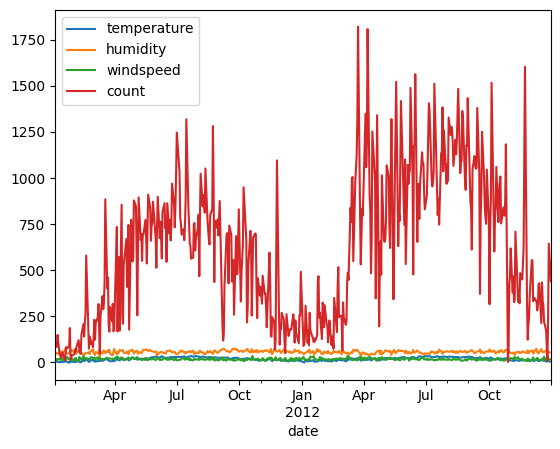

In [5]:
bikes.plot();

- With the graph above it's hard to get an indication for the temperature, humidity and windspeed in the data.

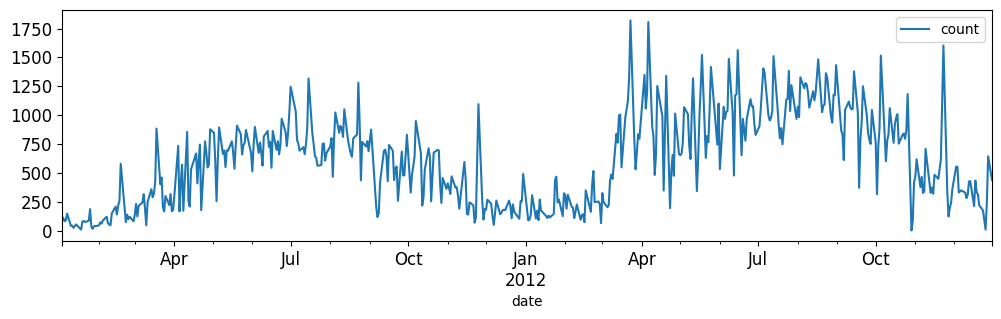

In [6]:
#Plot a graph with just the `count` as the `y-axis`.

bikes.plot(y='count', figsize=(12,3), fontsize=12);

Let's now visualise how the data looks like. We can observe a high variability in the count variable, as well as some seasonality, as bike rentals increase in the summer and decrease in the winter.

## ☑️ Decompose Bikes dataset

- Here we are exploring the concept of time series decomposition analysis.

- Let's use `statsmodels.tsa.seasonal.STL` method from statsmodels library to decompose the bikes time series.

- The above method decomposes a time series into trend, seasonal, and residual or noise components.

- It is useful for identifying underlying patterns and capturing seasonality in the data.


([documentation](https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html))

**JK NOTES ON**

**from statsmodels.tsa.seasonal import STL**


The STL (Seasonal and Trend decomposition using Loess) is a method used for time series decomposition provided by the statsmodels library in Python. It's particularly helpful in breaking down a time series into its three main components: trend, seasonality, and residuals.

**Here's a breakdown of each component:**

**Trend:** This represents the underlying long-term behavior or tendency of the data. It shows the overall direction in which the data is moving, ignoring short-term fluctuations.

**Seasonality:** Many time series exhibit patterns that repeat over specific intervals, such as daily, weekly, monthly, etc. Seasonality captures these repetitive patterns.

**Residuals:** These are the leftovers after the trend and seasonality have been extracted from the original time series. Residuals ideally represent random noise or fluctuations in the data that cannot be explained by the trend or seasonal components.

When you import STL from statsmodels.tsa.seasonal, you gain access to functions and tools that allow you to apply the Seasonal and Trend decomposition using Loess method to your time series data.

This code **performs the decomposition using STL** on your time series data and then plots the original series along with its trend, seasonal, and residual components. Adjust the parameters like the 'seasonal' value based on your data's seasonal pattern.

This decomposition is **beneficial for understanding the underlying structures** within your time series data, allowing better modeling or forecasting by analyzing and potentially removing trend and seasonality effects.

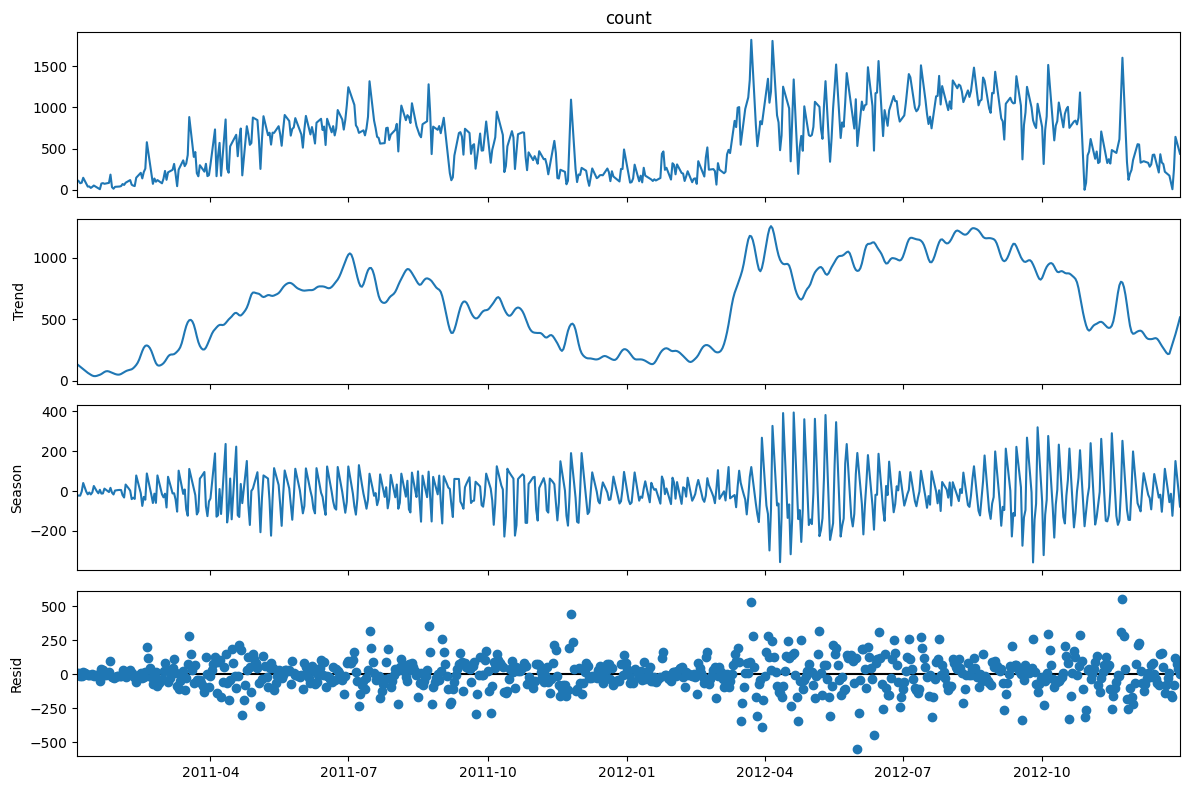

In [7]:
## https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html

# This imports the required libraries, including STL from statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import STL
# sets the default figure size for the plots
plt.rcParams['figure.figsize'] = [12,8]

# Perform seasonal decomposition
# Creates an STL object with the time series data 'count' from the bikes dataset.
stl = STL(bikes['count'])

# Fits the STL decomposition model to the data,
# decomposing it into trend, seasonal, and residual components.
result = stl.fit()

 # Plots the original time series along
 # with its decomposition into trend, seasonal, and residual components.
result.plot();


####show how you would extract the individual components (trend, seasonal,
## and residual) from the decomposition if you want to perform further
## analysis or visualization specifically on those components.
## To extract the trend, seasonal, and residual components
# trend = result.trend
# seasonal = result.seasonal
# residual = result.resid

In [8]:
result

# Part 4 - Time series pre-processing technique: Resampling

- Resampling
- Upsampling
- Downsampling

## ☑️ Resampling

Resampling involves changing the frequency of your time series observations. Resampling in time series analysis adjusts the time intervals or timestamps at which the data points are recorded.

There are two main types of resampling:

- **Upsampling**: increase the frequency of the samples, (e.g. from days to hours)
- **Downsampling**: decrease the frequency of the samples (e.g. from days to weeks)


Usually, we would use resampling because observations are at the wrong frequency, and we may want to make them more or less granular. This in many cases may depend on the application itself.

**JK NOTES ON**

**RESAMPLING**

Resampling is a fundamental technique in time series analysis that involves changing the frequency of your data observations. This process helps to adjust the timestamps or time intervals associated with your data. Two common types of resampling are:

**1) Upsampling (Increasing Frequency):**


Upsampling involves increasing the frequency of the data, typically from a lower frequency to a higher one (e.g., from days to hours).
This can result in creating new data points within the existing data range by interpolating or filling in missing values.

**2) Downsampling (Decreasing Frequency):**

Downsampling decreases the frequency of the data, usually from a higher frequency to a lower one (e.g., from hours to days).

It aggregates or reduces existing data points to fit into a larger time frame, such as taking daily averages of hourly data.

**Common Resampling Methods:**
Forward Filling (or Backward Filling):

**Forward filling** involves propagating the last known value forward to fill missing values.

**Backward filling** is the opposite, where the next known value is propagated backward to fill missing values.

**Interpolation:**

This method estimates missing values based on the existing data by using mathematical techniques like linear interpolation, cubic spline, etc.

**Why Resample?**

**Data Analysis and Visualization:**

Resampling can help align data from different sources or different frequencies for better comparison and analysis.

It can make visualization more manageable by adjusting the time intervals.

**Modeling:**

For some models, having data at a specific frequency might be necessary. Resampling helps to meet these requirements.

It can help in reducing noise or making patterns clearer by smoothing the data.

## ☑️ Downsampling

- This involves decreasing the frequency or granularity of the time series data.
- In downsampling, data points are aggregated or averaged over larger time intervals.

- This is typically done to reduce noise or to simplify the analysis when the original frequency is too high for the desired application


For example: we may observe hourly data but only be interested in daily measurements. Then one approach would be to compute the mean over all hourly measurements.

## Downsampling example

Let's see a downsampling example, here we aggregate `bikes` time series to report monthly averages:

In [10]:
## changing the dataset from days to months
## the count for Jan 2011 data is now 66.12 as a mean(average)

bikes_monthly = bikes.resample('M').mean()
bikes_monthly.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-31,2.350743,54.684742,17.147366,66.120690
2011-02-28,7.426941,53.606489,19.775876,155.875000
2011-03-31,9.221997,52.674953,19.868885,300.419355
2011-04-30,17.079434,57.189201,21.230807,531.822222
2011-05-31,21.865558,60.410474,17.385142,729.591398


- Use the `.resample()` method from `pandas` library to get the data aggregated to monthly averages
- Note the argument of the resample function ('M' for month) and the need to apply `.mean()` method after

([different frequencies for resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases))

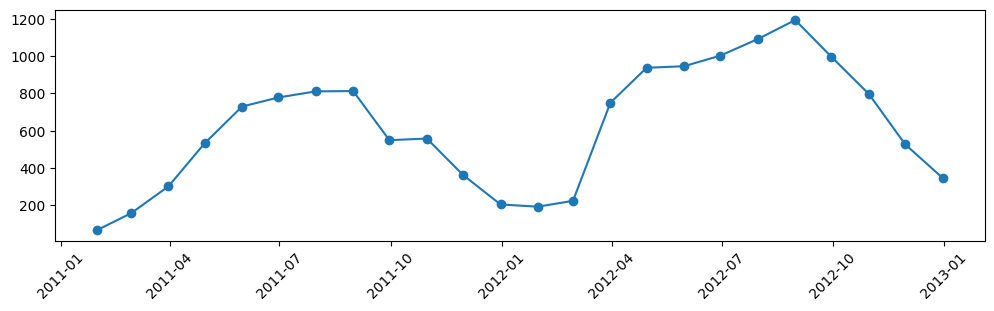

In [11]:
##monthly plot shown
## o used to indicate the value

plt.figure(figsize=(12,3))
plt.plot(bikes_monthly['count'], '-o')
plt.xticks(rotation=45);

- Finally, visualise the `count` time series for the monthly averages

These examples use the resample() function in Pandas with frequency ('H' for hourly, 'D' for daily) and method (such as ffill() for forward filling or mean() for averaging) specified.

Resampling allows you to adjust the time granularity of your data, ensuring it's in a format suitable for analysis, visualization, or modeling purposes.

## ☑️ Upsampling


- This involves increasing the frequency or granularity of the time series data.

- In upsampling, new data points are inserted between the existing observations to fill in the gaps.

- This technique is commonly known as "upsampling with interpolation."  

- This can be useful when you want to analyse the data at a higher frequency or when you need to align the time series with another dataset that has a different time resolution.


For example: if we observe data hourly but need measurements every 30 minutes, then one approach could be to simply average the measurements before and after (a linear interpolation model).

## Upsampling example

Let's see a upsampling example:

In [12]:
bikes_6h = bikes.resample('0.25D').ffill()
bikes_6h.head(8)

,temperature,humidity,windspeed,count
date,,,,
2011-01-03 00:00:00,2.716070,45.715346,21.414957,120.0
2011-01-03 06:00:00,2.716070,45.715346,21.414957,120.0
2011-01-03 12:00:00,2.716070,45.715346,21.414957,120.0
2011-01-03 18:00:00,2.716070,45.715346,21.414957,120.0
2011-01-04 00:00:00,2.896673,54.267219,15.136882,108.0
2011-01-04 06:00:00,2.896673,54.267219,15.136882,108.0
2011-01-04 12:00:00,2.896673,54.267219,15.136882,108.0
2011-01-04 18:00:00,2.896673,54.267219,15.136882,108.0


- Here we use the `.resample()` and `ffill()` methods from `pandas` library to upsample `bikes` time series.

- Note the argument of the resample function: '0.25D'.

    - We want to resample our variables every 6 hours (hence the '0.25D'). A frequency of '0.25D' represents a quarter of a day. It specifies a time interval of 6 hours (24 hours divided by 4).

- `resample('0.25D')` method creates the missing values but fill them with NaNs, so we need to use `.ffill()` to do the interpolation.

- `.ffill()` method is then applied to forward-fill any missing values within each resampled interval. If a value is missing at a particular time point, it will be filled with the last observed value before that time point.


([resampling with ffill](https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/))

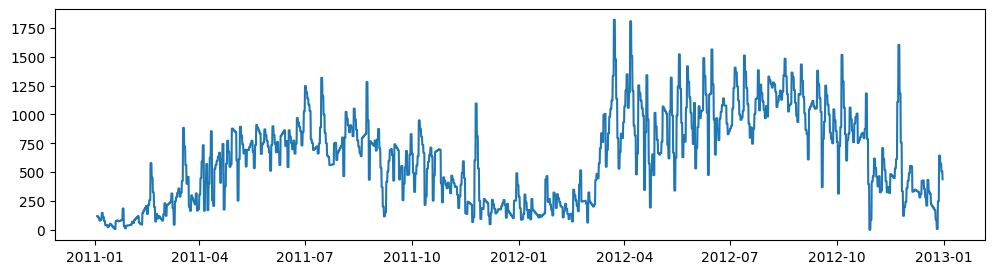

In [13]:
plt.figure(figsize=(12,3))
plt.plot(bikes_6h['count']);

- Finally, visualise the `count` time series with higher frequency

**Question:** What do you think of using this upsampling strategy?

**Answer:** This example might represent well the difficulty in using upsampling for some variables, since here it’s going to be dividing the day in 6 hour intervals and filling the unknown values with the last observation. This may be acceptable for `humidity` and `temperature` (assumption being that these do not change during the day) but definitely not for `count`.

# Part 5 - Time series pre-processing technique: Smoothing

- Smoothing
- Moving windows concept
- Moving average
- Exponential smoothing

## ☑️ Smoothing

- Smoothing techniques in time series analysis are specifically designed to reduce noise or fluctuations in the time series data, making it more stable and easier to work with.

- Smoothing techniques can be applied to remove the fine-grained variation between time steps (similar to downsampling).

- Smoothing techniques aim to highlight the underlying long-term patterns and trends and behaviours within the time series data.



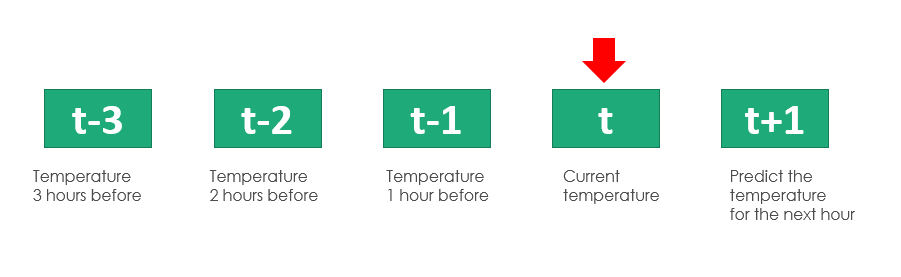

- The main idea behind smoothing is that when forecasting not all data might be considered equally useful. For example, if you aim to predict what is happening at time t, the observation at t-1 would usually be more relevant than the observation at t-5.

- This is like saying, if I want to forecast the temperature for the next hour, the temperature right now should ideally be more useful than the temperature 5 hours ago.

- To smooth the time series data, we can use techniques or set of calculations called moving windows. In the coming sections, we’ll explore this.

## ☑️ Moving windows concept

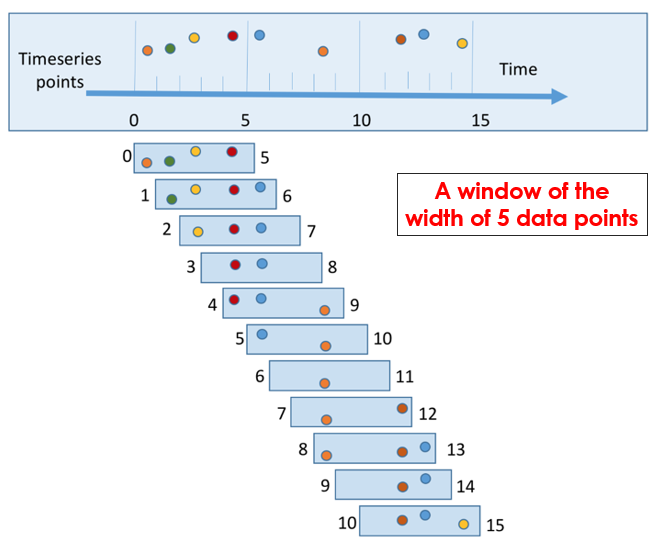

- Moving windows involves applying a function on repeated fixed-width “slices” (window) of the data sliding along in the direction of the data.

- This is represented in the figure shown, where we have a window (in this case of size 5) that slides through the data.

- A function is then applied to the data inside the window (e.g. the average) and this gives us our smoothed data.

## ☑️ Moving Average

* **One of the simplest smoothing techniques**
* The window slides along the time series
* Creates a new series by calculating the average of fixed-width windows
* Better exposes the trend of the data
* **The same principle can be used for moving standard deviation, moving median, etc**.

## Moving average example

Let's see a moving average or simple moving average example:

**JK NOTES ON CODE BELOW**

**bikes['temperature']:** This accesses the 'temperature' column in the bikes DataFrame. Presumably, bikes is a Pandas DataFrame containing various columns of data related to biking, and 'temperature' is one of those columns.

**.rolling(window=20):** This method is applied to the 'temperature' column and creates a rolling window object. The parameter window=20 specifies the size of the window used to compute the rolling statistics. In this case, it's a window size of 20 data points.

**.mean():** This calculates the mean (average) within the rolling window. For each data point in the 'temperature' column, the rolling mean is computed considering the current point and the previous 19 points (due to the window size of 20).

The resulting **rolling_mean** dataframe(variable) will contain the rolling mean values for the 'temperature' column, where each value represents the average temperature over a sliding window of 20 consecutive data points. This rolling mean computation is beneficial for smoothing out short-term fluctuations or noise in the temperature data, making underlying trends or patterns more apparent.

In [14]:
rolling_mean = bikes['temperature'].rolling(window=20).mean()
rolling_mean

date
2011-01-03         NaN
2011-01-04         NaN
2011-01-05         NaN
2011-01-06         NaN
2011-01-07         NaN
                ...   
2012-12-27    8.890117
2012-12-28    8.627275
2012-12-29    8.238186
2012-12-30    7.722850
2012-12-31    7.381362
Name: temperature, Length: 729, dtype: float64

- Moving Average uses `rolling()` method from `pandas` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling))

- We need to specify the size of the window (in this instance 20) as one of the arguments.

- Here we also need to specify a method to apply to these windows, in this case we are using the `mean()` method to calculate the average.

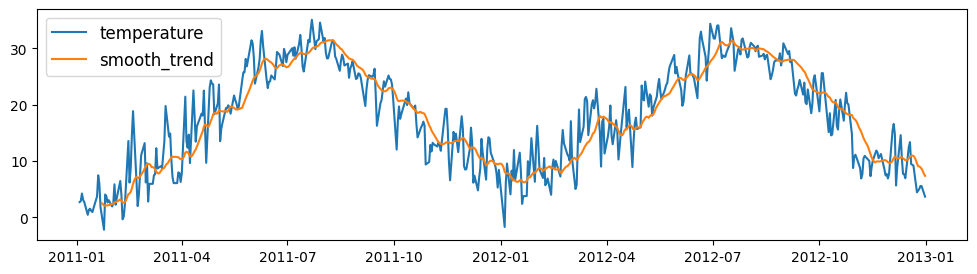

In [15]:
##HERE WE HAVE THE ORIGINAL VALUES IN temperature COLUMN IN bikes DATAFRAME
##WE ALSO HAVE THE ORIGINAL VALUES IN temperature COLUMN IN rolling_mean DATAFRAME
##WHICH IS 20 ROLLING MEAN TO GIVE THE SMOOTH_TREND


plt.figure(figsize=(12,3))
plt.plot(bikes['temperature'], label='temperature')
plt.plot(rolling_mean, label='smooth_trend')
plt.legend(fontsize=12);

- In the plot you can see the differences between the original data and the smoothed one. It certainly removes the peaks (noise or fluctuations) for easier analysis.

## ☑️ Exponential Smoothing (Exponential moving averages)


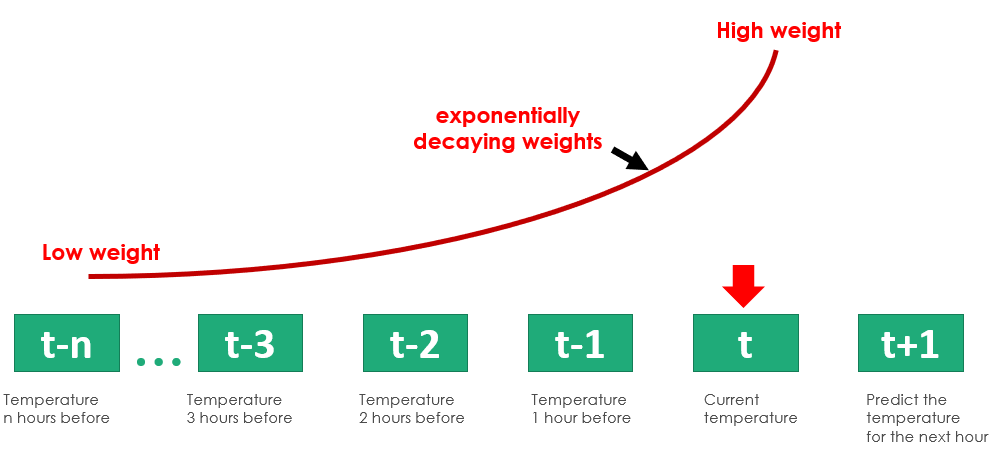


- Exponential Smoothing is a smoothing technique that can also be applied within moving windows.

- It assigns exponentially decreasing weights to past observations, with more recent observations given higher weights. It places more emphasis on recent data points while still considering older data.

- This implements the idea that not all data has the same importance for forecasting and more recent data might be more important.

- Sometimes this is also referred to as Exponential moving averages.

**JK NOTES ON**

**Exponential Smoothing**,
a popular technique in time series analysis, is used to produce smoothed data by giving more weight to recent observations and less weight to older observations. It's particularly useful for creating moving averages that respond more strongly to recent changes in the data while dampening the effect of older observations.

**Basic Idea:**

1)It uses a weighted average of past observations, with exponentially decreasing weights as the observations get older.
Recent observations receive higher weights, while older observations have diminishing influence.
Single Exponential Smoothing:

2)Single Exponential Smoothing (Simple Exponential Smoothing) is the simplest form of exponential smoothing.
It involves updating the forecast by taking a weighted average between the current observation and the previous forecast.

3) Formula for Single Exponential Smoothing:

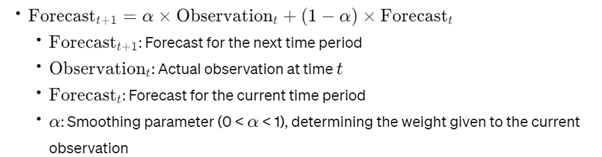

**Effect of Smoothing Parameter (α):**

**Higher**

α values give more weight to recent observations, making the forecast more responsive to changes but potentially increasing sensitivity to noise.

**Lower**

α values provide smoother forecasts but might be less responsive to recent changes.


**Types of Exponential Smoothing:**
**Simple Exponential Smoothing:** Uses a single smoothing parameter and applies it recursively.

**Double Exponential Smoothing (Holt's Method):** Extends simple exponential smoothing to handle trends by introducing a second smoothing parameter to account for trend.

**Triple Exponential Smoothing (Holt-Winters Method):**

Incorporates seasonality along with trend and level, using three smoothing parameters.

## Exponential smoothing example

Let's see an exponential smoothing or exponential moving averages example:

In [16]:
##ewm = exponential moving averages
exp_rolling_mean = bikes['temperature'].ewm(span=20).mean()
exp_rolling_mean

date
2011-01-03    2.716070
2011-01-04    2.810887
2011-01-05    3.334052
2011-01-06    3.270135
2011-01-07    3.138010
                ...   
2012-12-27    8.125333
2012-12-28    7.879661
2012-12-29    7.598254
2012-12-30    7.284515
2012-12-31    6.941525
Name: temperature, Length: 729, dtype: float64

- Moving average uses `ewm()` method from `pandas` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html))

- A smaller the span value, the faster the weights decay, giving more weight to recent values. Conversely, a larger span value results in a slower decay, assigning relatively more weight to historical values.

- It is common to choose the span value based on the characteristics of your data. There is no fixed scale for the span parameter, and it is often determined through experimentation or domain knowledge.

- Here we also need to specify a method to apply to these windows, in this case we are using the `mean()` method to calculate the average.

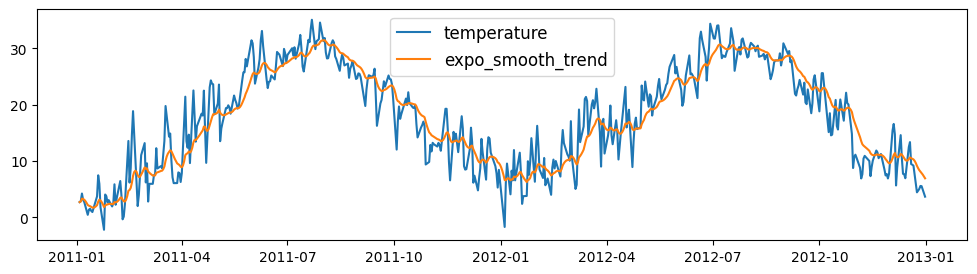

In [17]:
plt.figure(figsize=(12,3))
plt.plot(bikes['temperature'], label='temperature')
plt.plot(exp_rolling_mean, label='expo_smooth_trend')
plt.legend(fontsize=12);

- In the plot you can see the differences between the original data and the smoothed one. It certainly removes the peaks (noise or fluctuations) for easier analysis.

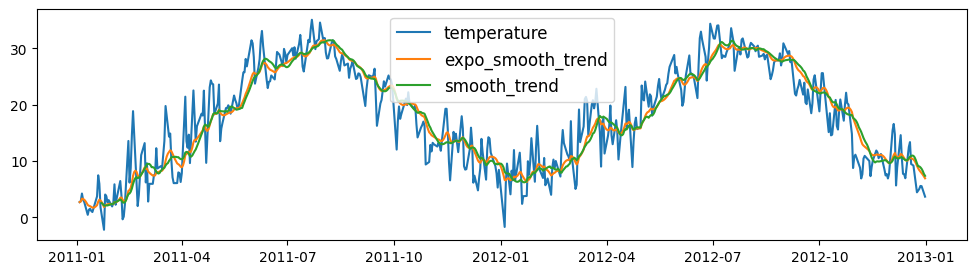

In [18]:
##ALL 3 PLOTTED

plt.figure(figsize=(12,3))
plt.plot(bikes['temperature'], label='temperature')
plt.plot(exp_rolling_mean, label='expo_smooth_trend')
plt.plot(rolling_mean, label='smooth_trend')
plt.legend(fontsize=12);

# Part 6 - Time series pre-processing technique: Correlation

- Correlation
- Shifting time series data
- Autocorrelation

## ☑️ Correlation

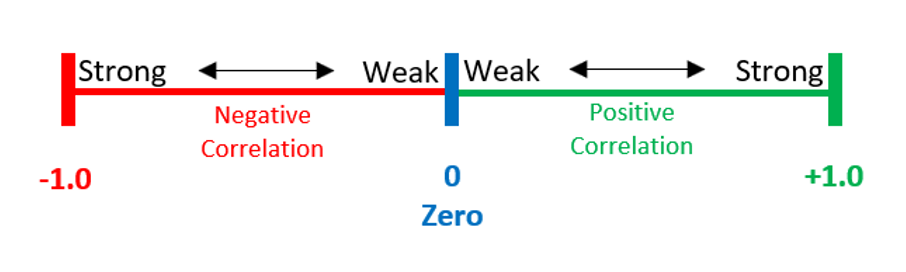

- Correlation measures the linear relationship between two variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

In [19]:
bikes.corr()

,temperature,humidity,windspeed,count
temperature,1.000000,0.096621,-0.139471,0.740959
humidity,0.096621,1.000000,-0.253124,-0.149185
windspeed,-0.139471,-0.253124,1.000000,-0.162707
count,0.740959,-0.149185,-0.162707,1.000000


- Time series may be univariate (ie there is only one factor which affects the variable of interest)  or multivariate (the bikes dataset where we have multiple time series).

- Often we might have correlated variables, to check this we can simply apply the `corr()` method to the dataframe.

- What we can see from the correlation matrix is that in the `bikes` dataset the most correlated variables are `count` and `temperature` variables.

- A high correlation indicates that when `temperature` is high so is rentals or `count` of bikes, and vice versa.

**JK NOTES ON**

**CORRELATION**

**Correlation** is a statistical measure that quantifies the degree of association or linear relationship between two variables. It assesses how changes in one variable are associated with changes in another variable.

**Key Points about Correlation:**
Range of Values:

Correlation values range from -1 to +1.

**Positive Correlation (0 to +1):** Indicates that as one variable increases, the other tends to increase as well.

**Negative Correlation (0 to -1):** Indicates that as one variable increases, the other tends to decrease.

**Strength of Relationship:**

The magnitude of the correlation coefficient indicates the strength of the relationship:

Values close to +1 or -1 indicate a strong linear relationship.

Values close to 0 suggest a weak linear relationship or no linear relationship.

**Interpretation:**

A correlation of +1 indicates a perfect positive linear relationship.

A correlation of -1 indicates a perfect negative linear relationship.

A correlation of 0 indicates no linear relationship.
However, it's essential to note that correlation does not imply causation. Even with a strong correlation, it does not necessarily mean that one variable causes changes in the other.

**Correlation Coefficient (Pearson's Correlation):**

Pearson's correlation coefficient is commonly used to measure linear correlation between two continuous variables.
It's calculated using the formula:

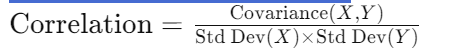

Where Covariance(X, Y) is the covariance between variables X and Y, and Std Dev(X) and Std Dev(Y) are the standard deviations of X and Y, respectively.

**Interpretation Example:**
If you have two variables, like temperature and ice cream sales:

A **positive correlation** (say, +0.8) implies that as the temperature increases, ice cream sales tend to increase as well.

A **negative correlation** (say, -0.6) suggests that as the temperature rises, ice cream sales tend to decrease.

**Limitations of Correlation:**
Correlation measures only linear relationships; it might miss nonlinear associations.
It measures only association, not causation. Just because two variables are correlated doesn’t mean one causes the other.
In summary, **correlation helps to quantify the strength and direction of the linear relationship** between two variables. It's a valuable tool in understanding the association between different factors in data analysis, but its interpretation should consider other factors and potential confounding variables in the dataset.

## ☑️ Shifting time series

Shifting time series data is a common operation in data analysis and forecasting tasks. Shifting time series data  does not change the underlying data at all. It involves moving the values of a time series forward or backward in time.

Sometimes we want to shift time series data:

* To remove a known consistent latency
* To help identify causal relationships more easily
* To create lag features

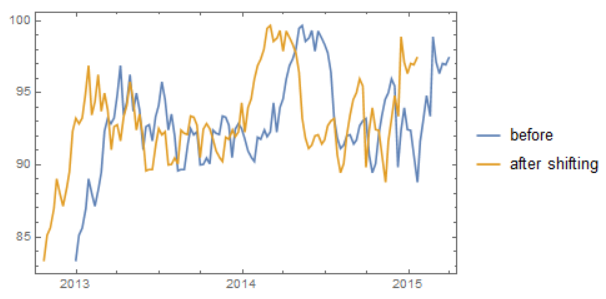

## Shifting example
Shift the whole dataframe with a period of 365.

**JK NOTES ON SHIFT(PERIODS=365)**

Python's Pandas library, the shift() function is used to shift the index of a DataFrame by a specified number of periods. When applied to a DataFrame like bikes.shift(periods=365), it means shifting the rows by 365 periods (in this case, probably days) within the DataFrame bikes.

Assuming bikes is a DataFrame containing data about bicycles (like daily sales, rentals, or any other relevant information), applying bikes.shift(periods=365) would move each row in the DataFrame down by 365 rows. This action effectively shifts the entire dataset by 365 days, so each entry's data would correspond to its information 365 days earlier.

For instance, if bikes contained daily sales figures for bicycles, shifting by 365 periods would align the data of each row with the data that was recorded one year prior.

Keep in mind that the shifted data would likely create NaN (Not a Number) values at the beginning of the DataFrame since there wouldn't be any data available for those shifted rows, assuming the DataFrame doesn't have historical data that goes back 365 days from its start.

DATA FOR 2011-01-03 IS MOVED TO 2012-01-03

In [20]:
bikes.shift(periods=365)

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN
2011-01-06,NaN,NaN,NaN,NaN
2011-01-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2012-12-27,7.820556,49.436222,24.671369,255.0
2012-12-28,5.297420,53.358888,12.220576,254.0
2012-12-29,8.443281,56.848605,13.285195,491.0


- To shift the data we can simply use the `shift()` method. ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)).


- We need to pass an argument that indicates how much we want to shift. Checking the result when shifting the bikes dataset we can see that it creates a number of data points equivalent to the shifting period equal to NaNs.

## Visualising Shifting

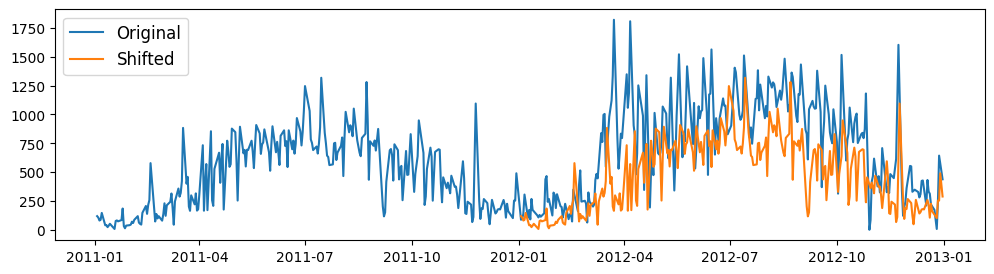

In [21]:
plt.figure(figsize=(12,3))
plt.plot(bikes['count'], label='Original')
plt.plot(bikes['count'].shift(365), label='Shifted')
plt.legend(fontsize=12);

## ☑️ Autocorrelation

- The word "autocorrelation" is composed of two components: "auto" and "correlation."

- "Auto" is a prefix derived from the Greek word "autos," meaning "self." In the context of autocorrelation, "auto" refers to the relationship or comparison of a variable with itself, specifically across different points in time.

- Autocorrelation measures the degree of similarity between a time series and a lagged version of itself. In other words, it examines the correlation (similarity) between observations of a variable at different points in time.

## Autocorrelation example


**JK NOTES ON PYTHON BELOW**

In Pandas, the **resample()** function is used to change the frequency of the time series data. When used with a time series DataFrame like bikes, bikes.resample('M').mean() performs two main actions:

**Resampling ('M'):** The argument **'M'** stands for monthly frequency. It means the data will be ***grouped into monthly bins*** or intervals based on the timestamp or index of the DataFrame. It will create new 'virtual' months and aggregate the data accordingly.

**Aggregation (.mean()):** Once the data is grouped into these monthly intervals, the **.mean()** function calculates the mean (average) value for each column within each monthly group. This means that if the original data in bikes is daily data (for example, daily bike sales or rentals), after resampling, you'll get an **average value for each column for every month** in the dataset.

In [23]:
bikes_monthly = bikes.resample('M').mean()
bikes_monthly.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-31,2.350743,54.684742,17.147366,66.120690
2011-02-28,7.426941,53.606489,19.775876,155.875000
2011-03-31,9.221997,52.674953,19.868885,300.419355
2011-04-30,17.079434,57.189201,21.230807,531.822222
2011-05-31,21.865558,60.410474,17.385142,729.591398


**JK NOTES ON PYTHON BELOW**

This code seems to be calculating autocorrelation values for a time series dataset.

**lags = range(1, 13):** This line generates a range of lags from 1 to 12 (inclusive). These lags represent the number of time periods (in this case, months) by which the time series data will be shifted to calculate autocorrelation.

**autocorrs = [bikes_monthly['count'].autocorr(lag=lag) for lag in lags]:**
This line calculates autocorrelation values for the 'count' column in the bikes_monthly DataFrame for each lag value in the range of 1 to 12.

**bikes_monthly['count']**

refers to the 'count' column in the bikes_monthly DataFrame (assuming 'count' is a column that represents bike counts, sales, or some numerical value).

**.autocorr(lag=lag)**
computes the autocorrelation for the specified lag. Autocorrelation measures the relationship between a time series and a lagged version of itself. It indicates how correlated the series is with a delayed version of itself by a certain number of time periods (lags).

**autocorrs:**
This variable stores the autocorrelation values calculated for each lag value in the lags range. It will contain a list of autocorrelation values corresponding to lags 1 through 12.

In [24]:
lags = range(1, 13)
autocorrs = [bikes_monthly['count'].autocorr(lag=lag) for lag in lags]
autocorrs

[0.8336662965420373,
 0.48399147364428086,
 0.0793672672064188,
 -0.25659141611837305,
 -0.46287833223992386,
 -0.6340736130829578,
 -0.5956502825523258,
 -0.33257356808270877,
 0.08787977237213135,
 0.6155489940424757,
 0.8684207037855732,
 0.9407674011406472]

- The above code calculates the autocorrelation values for a monthly time series data of bike rentals. It uses a range of lags and `autocorr()` method to calculates the autocorrelation for each lag. ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.autocorr.html)).

## Autocorrelation values can be visualised using an ACF plot.  

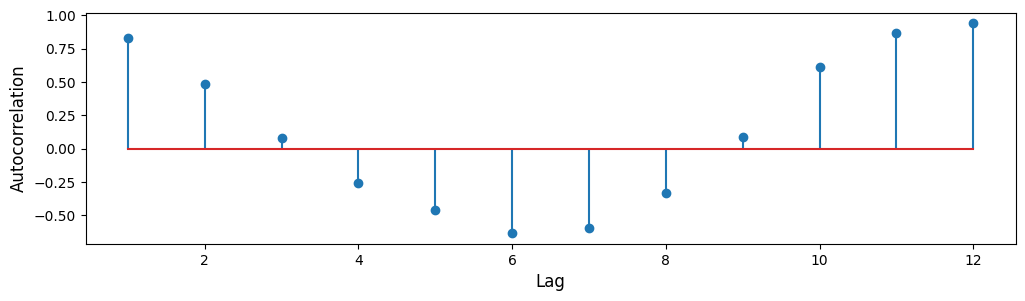

In [25]:
plt.figure(figsize=(12,3))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12);

- We can see is that there seems to be autocorrelation when using multiples of 6, this may be exactly the effect of seasonality, which repeats every 6 time steps (every six months).

# Part 7 - Stationarity Assumption in time series data

- Stationarity
- Differencing

## ☑️ Stationarity

- A common assumption in many time series analysis techniques is that the data are stationary.


- Stationarity, in the context of time series analysis, refers to a property of a time series where statistical properties such as mean, variance, and autocorrelation remain constant over time.


- A stationary time series exhibits consistent behaviour over different time periods, without any systematic trends, seasonality, or significant changes in statistical properties.

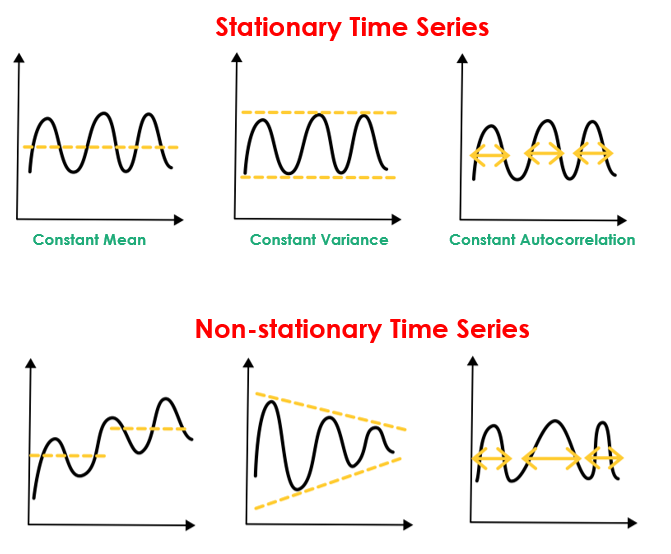

## Why is stationarity important?

In order to use certain time series models effectively, like the AutoRegressive Integrated Moving Average (ARIMA) model, we need to ensure that the data we're working with is stationary.

**JK NOTES ON STATIONARITY**

**Stationarity** is a crucial concept in time series analysis because many time series models and statistical tests assume or work best under stationary conditions. **A stationary time series is one where statistical properties like mean, variance, and covariance remain constant over time**. **This means that the series doesn't exhibit trends, seasonality, or systematic patterns in the data.**

**Here's why stationarity is important:**

**Simplifies Modeling**:

Stationary data simplifies modeling. Models assume that the statistical properties of the data remain constant over time. For instance, in linear regression, assumptions like constant variance and independence of residuals are more likely to be satisfied with stationary data.

**Predictability**:

Stationary time series tend to be more predictable because they lack changing trends or patterns. Forecasting models often work better with stationary data as they can extrapolate historical patterns into the future more reliably.

**Statistical Tests**:

Many statistical tests and techniques, such as autoregression and moving average models, assume stationarity for their validity. When data isn’t stationary, the results from these models may not be accurate or reliable.

**Meaningful Insights**:

Stationary data can help uncover meaningful insights. Non-stationary data might have trends or seasonal variations that obscure the underlying patterns or relationships in the data. Stationary series make it easier to identify true correlations and causal relationships

To achieve stationarity, sometimes transformations or differencing techniques are applied to the time series data. These techniques aim to remove trends or seasonality, making the data more stationary. Once the data becomes stationary, it becomes easier to model and analyze, allowing for more accurate predictions and meaningful insights

## ☑️ Differencing

- Differencing is a common technique used to transform a non-stationary time series into a stationary one.

- Differencing is performed by subtracting a previous observation from the current observation. Here with a lag of 1:
$$\hat{x}_t = x_t - x_{t-1}$$


- Using differencing can help remove the trend and seasonality and expose the noise in the time series.

**JK NOTES ON DIFFERENCING**

Differencing is a common technique used in time series analysis to transform a non-stationary time series into a stationary one. It involves computing the difference between consecutive observations in the time series data.


The idea behind differencing is to remove trends or seasonality present in the data, making the series more stationary by eliminating the variations that might depend on time. This technique is particularly useful when dealing with data that exhibits trends, seasonality, or other non-stationary behavior.

There are two primary types of differencing:

First-order differencing (1st Difference):

The first-order difference is calculated by subtracting each observation from the observation that follows it.
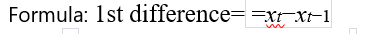

  represents the previous time's value.
This technique is effective in removing linear trends from the data.
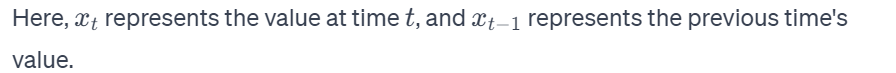

This technique is effective in removing linear trends from the data.

2) Seasonal differencing:

Seasonal differencing is used to eliminate seasonal patterns by subtracting the observation from the same season of the previous year or cycle.
For example, in monthly data, the seasonal difference for a lag of 12 would subtract the observation for January from the observation for the previous January.
Formula:
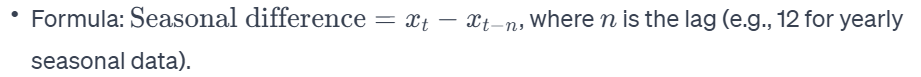
Seasonal difference


Seasonal difference

n is the lag (e.g., 12 for yearly seasonal data).
It helps in removing periodic patterns within each cycle.

The process of differencing can be performed multiple times if the data remains non-stationary after the initial differencing. The goal is to achieve stationarity where the mean, variance, and covariance remain constant over time.

After differencing, statistical models like ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA) can be applied more effectively to the transformed stationary data to make predictions or derive insights.

## Differencing example


**JK NOTES ON PYTHON CODE BELOW**

**bike_diff = bikes['count'].diff(periods=1) # lag of 1:**

**bikes['count']** selects the 'count' column from the DataFrame bikes. Presumably, this column contains data related to bike counts (sales, rentals, etc.).

**.diff(periods=1)**
calculates the first-order difference of the 'count' column. This operation computes the difference between each element in the 'count' column and the element that precedes it by one position (a lag of 1). This effectively creates a new series where each value is the difference between the current value and the value from one step before.

The result is stored in the variable **bike_diff**, which contains the first-order differenced values of the 'count' column.

**pd.concat([bikes['count'], bike_diff], axis=1):**

**pd.concat()** is a function in Pandas used to concatenate DataFrames or Series along a particular axis.

**[bikes['count'], bike_diff]** is a list containing two items: the original 'count' column from the DataFrame bikes and the bike_diff series, which represents the differenced values.

**axis=1** specifies that the concatenation should be done along the columns (side by side) as opposed to rows.

This line concatenates the original 'count' column and the differenced values (bike_diff) along the columns, creating a new DataFrame where both series are aligned side by side.

In [27]:
bike_diff = bikes['count'].diff(periods=1)    #lag of 1
bike_diff

pd.concat([bikes['count'],bike_diff], axis=1)

,count,count
date,,
2011-01-03,120.000000,NaN
2011-01-04,108.000000,-12.000000
2011-01-05,82.000000,-26.000000
2011-01-06,88.000000,6.000000
2011-01-07,148.000000,60.000000
...,...,...
2012-12-27,247.000000,238.000000
2012-12-28,644.000000,397.000000
2012-12-29,575.666667,-68.333333


- Differencing is performed by substracting a previous observation from the current one, as indicated in the equation for a lag of one.

- Different lags could be used for different purposes (e.g. a lag of 1 to remove the trend, or a lag of m to remove seasonality).

- The `diff()` method in pandas is used to calculate lags in time series.(`pd.DataFrame.diff`:[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)).

## Visualising Differencing

**JK NOTES ON PYTHON CODE BELOW**

The code you provided is generating a plot to visualize the original time series (bikes['count']) alongside the first-order differenced time series (bike_diff) with a lag of 1.

Let's break down the code and the resulting visualization:

**plt.figure(figsize=(12, 3)):**

This line initiates a new Matplotlib figure with a specified size of 12 inches in width and 3 inches in height. It sets up the dimensions for the upcoming plot.

**plt.plot(bikes['count'], label='original ts'):**

This line plots the original time series data from the 'count' column of the bikes DataFrame.
It uses plt.plot() to create a line plot for the 'count' data, labeling it as 'original ts' in the legend.

**plt.plot(bike_diff, label='diff ts (lag=1)'):**

This line plots the first-order differenced time series (bike_diff) with a lag of 1.
It uses plt.plot() again to create a line plot for the differenced data, labeling it as 'diff ts (lag=1)' in the legend.

**plt.legend(fontsize=12):**

This line adds a legend to the plot, displaying labels for the different lines (original and differenced time series) with a specified font size.

**The resulting plot will show two lines:**

The blue line represents the original time series (bikes['count']), showing the trend, seasonality, or any patterns present in the data.
The orange line represents the first-order differenced time series (bike_diff) with a lag of 1. This line illustrates how the values have changed from one time point to the next (lag of 1), highlighting the differences or fluctuations between consecutive observations.

This visualization allows for a direct comparison between the original time series and its differenced version, aiding in understanding the impact of differencing on the data and identifying any potential patterns or trends that might have been removed by differencing.

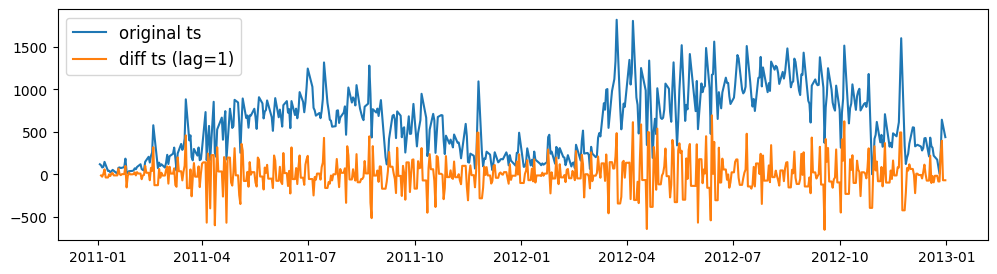

In [28]:
plt.figure(figsize=(12, 3));
plt.plot(bikes['count'], label='original ts');
plt.plot(bike_diff, label='diff ts (lag=1)');
plt.legend(fontsize=12);

- Let's check an example of differencing. We are using here the method diff with a lag of 1.

- What can you observe from the plot? We can see that the time series is stationary and scale of the plot changes, as a consequence of substracting the previous value.

# Part 8 - Forecasting
- What is time series forecasting?
- Forecasting example

## ☑️ What is time series forecasting?

- The goal of time series forecasting is to predicting future values or trends of a time-dependent variable based on historical data patterns.


- It involves analyzing the historical behavior of the time series, identifying relevant patterns or relationships, and using statistical or machine learning techniques to generate forecasts for future time points.

**JK NOTES ON TIMES SERIES FORECASTING**

Time series forecasting is a method used to **predict future values based on historical data points collected at regular intervals over time**. It involves analyzing patterns, trends, and dependencies within a sequential dataset to make educated estimations about future values.

**Key components of time series forecasting include:**

**Time-Ordered Data:** Time series data is ordered chronologically, with observations indexed by time intervals (e.g., hourly, daily, monthly).

**Patterns and Trends:** Time series often exhibit patterns such as trends (long-term movements in data), seasonality (regular fluctuations), and other underlying structures.

**Forecasting Techniques:** Various statistical and machine learning methods are applied to time series data for forecasting. These include:

**Statistical Models:** Methods like ARIMA (AutoRegressive Integrated Moving Average), exponential smoothing, and state space models.

**Machine Learning Models:** Algorithms like neural networks (e.g., LSTM - Long Short-Term Memory), random forests, and gradient boosting that can capture complex patterns and relationships within the data.

**Hybrid Approaches:** Combining multiple models or techniques to improve forecast accuracy.

**Evaluation and Validation:**
Models are evaluated using metrics like Mean Squared Error (**MSE**), Root Mean Squared Error (**RMSE**), Mean Absolute Error (**MAE**), etc., to assess how well they predict future values compared to the actual observed values.

**Use Cases:** Time series forecasting finds applications in various domains:

**Finance:** Predicting stock prices, market trends, or economic indicators.

**Sales and Demand Forecasting**: Predicting sales volumes, demand for products, or seasonal variations.

**Weather Forecasting:** Predicting future weather conditions based on historical data.

**Resource Planning:** Forecasting resource utilization, inventory levels, or energy consumption.

The goal of time series forecasting is **to make accurate predictions about future values based on historical observations**. It's important to note that while forecasting models can provide valuable insights, they are based on historical data and may not account for sudden, unforeseen events or changes in underlying patterns. Therefore, forecasts should be used alongside other information and domain knowledge for decision-making

## ☑️ Forecasting example

Let's dive into an example of building a forecasting model using the Prophet library to predict bike rentals. We will utilize the `bikes` dataset, which contains relevant information for our analysis.

The Prophet library is an open-source library, published by Meta, designed for making forecasts for univariate time series datasets. It provides the ability to make time series predictions with good accuracy using simple intuitive parameters and has support for including impact of custom seasonality and holidays.

We use it to illustrate an example of forecasting though the Prophet library is outside of the scope of this module. Hence do not be concerned about the detail of the code - it is the principles that are relevant here.

In [30]:
import pandas as pd
from prophet import Prophet

#df = pd.read_csv("data/bikes.csv")
df = pd.read_csv("bikes.csv")
df = df[['date','count']].copy()
df.head()

,date,count
0,2011-01-03,120.0
1,2011-01-04,108.0
2,2011-01-05,82.0
3,2011-01-06,88.0
4,2011-01-07,148.0


In [31]:
##changing the format of column date to datetime format
df["date"] = pd.to_datetime(df["date"])
#rename columns date to ds and count to y
df = df.rename(columns={"date": "ds", "count": "y"})
#show the first 5 records
df.head()

,ds,y
0,2011-01-03,120.0
1,2011-01-04,108.0
2,2011-01-05,82.0
3,2011-01-06,88.0
4,2011-01-07,148.0


In [32]:
# Split the data into before and after August 2012; we can use the data prior to this date to
# make a forecast for the rest of 2012 and we can then compare the forecast against what actually happened.

##date for the split
split_date = '2012-08-01'

#data before 2012-08-01 saved under dataframe ts
ts = df[df['ds'] < split_date]

#data after or equal to  2012-08-01 saved under dataframe ts_eval
ts_eval = df[df['ds'] >= split_date]

In [33]:
#  The number of data points

print(len(ts))
print(len(ts_eval))

576
153


**JK EXPLAIN PYTHON CODE BELOW**

This Python code snippet utilizes the Prophet library, developed by Facebook, for time series forecasting. Specifically, it creates and fits a Prophet model to the time series data provided in the variable ts.

Let's break down the code:

**Prophet():**

Prophet() is an additive regression model used for time series forecasting, developed by Facebook's research team.
It's designed to handle time series data with specific characteristics like seasonality, holidays, and outliers.
The parameters within Prophet() allow customization of the model's behavior.

**growth="linear":**

This parameter specifies the type of growth trend expected in the time series data. In this case, it's set to "linear," implying a linear growth trend.
Other growth options in Prophet include "logistic" for growth bounded by a maximum capacity.

**weekly_seasonality=7 and yearly_seasonality=6:**

These parameters indicate the inclusion of weekly and yearly seasonality components in the model.

**weekly_seasonality=7** sets the weekly seasonality with a periodicity of 7 days, which is common for weekly patterns.

**yearly_seasonality=6** sets the yearly seasonality with a periodicity of 6 cycles per year (assuming the data is in terms of months).

**model.fit(ts):**

This line fits the Prophet model to the provided time series data, ts.
ts is expected to be a DataFrame or a Pandas Series containing a time series with two columns: '**ds**' (representing the timestamps) and '**y**' (representing the values to be forecasted).

After this code is executed, the model variable will contain the trained Prophet model, configured with the specified growth type, weekly and yearly seasonality, and fitted to the provided time series data.

The next steps might involve using this trained model for making predictions, visualizing forecasts, and evaluating its performance on unseen data to assess its accuracy in predicting future values based on the learned patterns and seasonality within the time series.

In [34]:
model = Prophet(growth="linear", weekly_seasonality=7, yearly_seasonality=6)
model.fit(ts)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgklba95x/23b68pyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgklba95x/tzkssvi7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5055', 'data', 'file=/tmp/tmpgklba95x/23b68pyl.json', 'init=/tmp/tmpgklba95x/tzkssvi7.json', 'output', 'file=/tmp/tmpgklba95x/prophet_modeljb_dxkwu/prophet_model-20231128163430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**JK NOTES ON PYTHON CODE BELOW**

This Python code snippet is used in the context of a Prophet model for time series forecasting. Let's break it down:

**model.make_future_dataframe(periods=len(ts_eval), freq='D'**):


model refers to the previously trained Prophet model object.

**.make_future_dataframe()** is a method provided by Prophet to generate a DataFrame containing future timestamps for which predictions will be made.

**periods=len(ts_eval):** This parameter determines the number of future data points (timestamps) to create. It uses the length of the ts_eval dataset.

**freq='D':** Specifies the frequency of the timestamps to be generated. In this case, 'D' stands for daily frequency, indicating that the timestamps will be generated on a daily basis.

**future:**

The result of model.make_future_dataframe() is assigned to the variable future.

This variable future contains a DataFrame with timestamps representing the future time points for which the model will make predictions.

So, after executing this code, the variable future will hold a DataFrame with timestamps for future dates (determined by the length of ts_eval and the specified frequency) that the Prophet model will use to generate forecasts or predictions. These timestamps represent the periods for which the model will predict the values based on the learned patterns and seasonality from the training data.

In [35]:
future = model.make_future_dataframe(periods=len(ts_eval), freq='D')
future

,ds
0,2011-01-03
1,2011-01-04
2,2011-01-05
3,2011-01-06
4,2011-01-07
...,...
724,2012-12-27
725,2012-12-28
726,2012-12-29
727,2012-12-30


**JK EXPLAIN THE CODE BELOW**

**future = model.make_future_dataframe(periods=len(ts_eval), freq='D'):**

model refers to the previously trained Prophet model object.

**.make_future_dataframe()** is a method provided by Prophet to create a DataFrame with future timestamps for forecasting.

**periods=len(ts_eval):** Determines the number of future data points (timestamps) to generate. It's set to the length of the ts_eval dataset.

**freq='D':** Specifies the frequency of the timestamps to be generated. In this case, 'D' stands for daily frequency, indicating that the timestamps will be created on a daily basis.

The result, the DataFrame containing future timestamps, is stored in the variable future.

**forecast = model.predict(future):**

model refers to the trained Prophet model object.

**.predict()** is a method in Prophet that generates forecasts or predictions for the future timestamps provided.

The future DataFrame (containing the timestamps for future periods) is passed as an argument to model.**predict()**.

The result of this operation is stored in the variable forecast, **which will contain the predictions made by the Prophet model for the future timestamps generated in the future DataFrame.**

After running this code, the variable forecast will hold the predicted values for the timestamps generated in the future DataFrame. These predictions are generated by the Prophet model based on the learned patterns and seasonality from the training data, and they represent the forecasted values for the future time periods specified.

In [36]:
future = model.make_future_dataframe(periods=len(ts_eval), freq='D')
forecast = model.predict(future)

**JK NOTES ON PYTHON CODE BELOW**

**forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]:**

forecast is the variable containing the output of the Prophet model's predictions for future timestamps.

**[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]** is used to select specific columns from the forecast DataFrame:

**'ds':** Represents the timestamps or dates for the forecasted values.
**'yhat':** Corresponds to the predicted values by the model.
**'yhat_lower'** and **'yhat_upper'**: Represent the lower and upper bounds of the predicted values, providing a range of uncertainty around the predictions.

**.tail(len(ts_eval))**:

**.tail()** is a Pandas DataFrame method used to retrieve the last rows of a DataFrame.

**len(ts_eval)** determines the number of rows to retrieve from the end of the DataFrame, based on the length of the ts_eval dataset.

So, when this code is executed, it will return a DataFrame containing the last **len(ts_eval)** rows of the **forecast** DataFrame, specifically selecting columns** 'ds', 'yhat', 'yhat_lower', and 'yhat_upper'**. These rows would typically represent the forecasted timestamps and their corresponding predicted values, along with the associated upper and lower bounds of the predictions, giving an indication of the uncertainty around the forecasted values for the specified future time periods.

In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(ts_eval))

,ds,yhat,yhat_lower,yhat_upper
576,2012-08-01,999.237059,751.294958,1248.611570
577,2012-08-02,1047.755418,800.238499,1289.604185
578,2012-08-03,1180.356641,930.681082,1437.114253
579,2012-08-04,1138.263214,890.913077,1397.249104
580,2012-08-05,1095.737834,848.868444,1342.278089
...,...,...,...,...
724,2012-12-27,431.075539,175.775055,686.411459
725,2012-12-28,569.002217,299.719865,809.950321
726,2012-12-29,532.831049,300.276562,784.314348
727,2012-12-30,496.798516,255.160822,760.452985


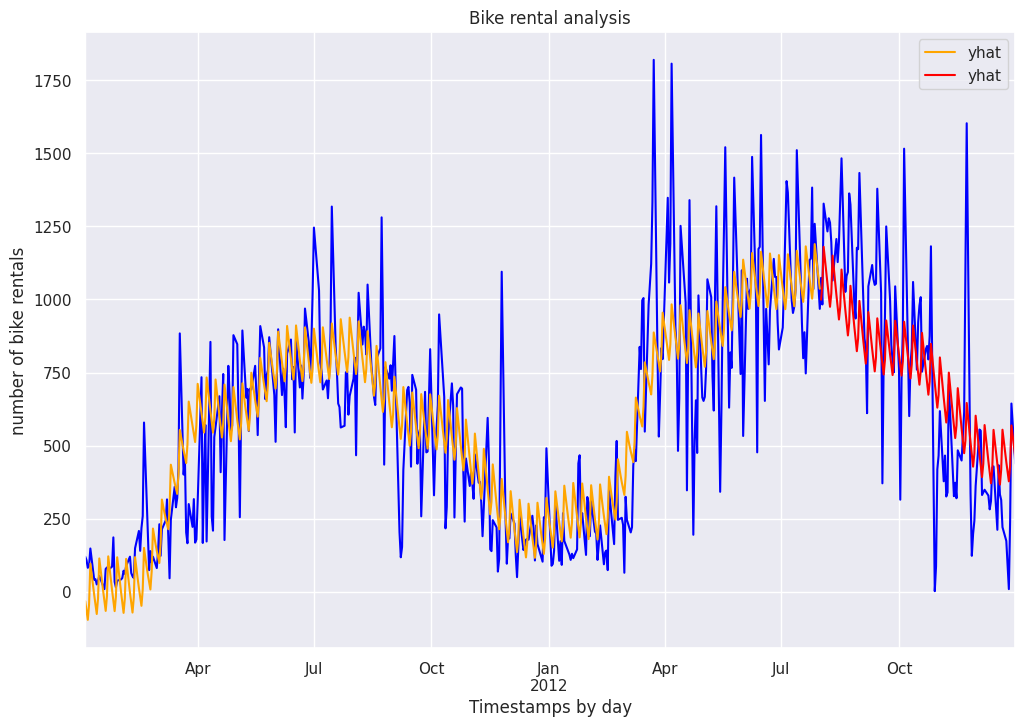

In [38]:
# We can plot the results. The red line is the forecast and can be compared with the actual pattern in blue.
# It can be seen the overall shape is broadly correct, although the fluctuations (which are strongly correlated
# with temperature) are, unsurprisingly, not reflected in the forecast.

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(12,8)})

ax = df.set_index('ds')['y'].plot(color='blue', figsize=(12,8))   #original data - -> df

forecast[['ds','yhat']].set_index('ds').head(len(ts)).plot(ax=ax, color='orange')    #predictions on known data points --> ts
forecast[['ds','yhat']].set_index('ds').tail(len(ts_eval)).plot(ax=ax, color='red')  #prediction on future periods --> ts_eval

ax.set(title='Bike rental analysis')
ax.set(xlabel='Timestamps by day', ylabel='number of bike rentals')

plt.show()

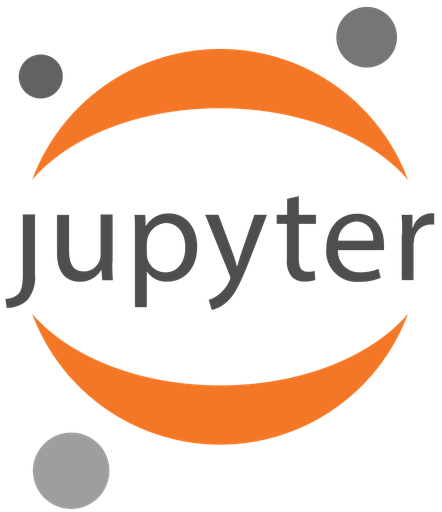

Now open the following workbook: `introduction-time-series-workbook.ipynb`